In [3]:
import pandas as pd
import numpy as np

In [5]:
import sys


import pandas as pd
import sklearn as sk
import tensorflow as tf
import platform

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU')) > 0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: macOS-14.5-arm64-i386-64bit
Tensor Flow Version: 2.13.0

Python 3.8.19 (default, Mar 20 2024, 15:27:52) 
[Clang 14.0.6 ]
Pandas 2.0.3
Scikit-Learn 1.3.2
GPU is available


In [ ]:
import pandas as pd
from faker import Faker
import random

# Initialize Faker
fake = Faker('en-IN')

# List of words to choose from
skill_list = ['Java', 'frontend', 'backend', 'elex', 'robotics']

# Function to generate a random string from the word list


def generate_random_string():
    return random.choice(skill_list)


# Generate data for 2000 students
data = []
for _ in range(10000):
    name = fake.name()
    sap_id = int(fake.unique.random_number(digits=8))
    branch = random.choice(["Electronics ant Telecommunication Engineering", "Mechanical Engineering",
                           "Computer Engineering", "Computer Science in Data Science", "AIML", "AIDS", "CSI-ICB"])
    skills = []
    for _ in range(5):  # Append 5 random skills
        random_skill = generate_random_string()
        skills.append(random_skill)

    gender = random.choice(['Male', 'Female', "Not specified"])  # Add gender
    data.append([name, sap_id, branch, skills, gender])

# Create a DataFrame
columns = ['Name', 'SAP ID', 'Branch', 'Skills', 'Gender']
df = pd.DataFrame(data, columns=columns)

# Display the first few rows
print(df.head())

In [ ]:
df.to_json("studentData", index=False)

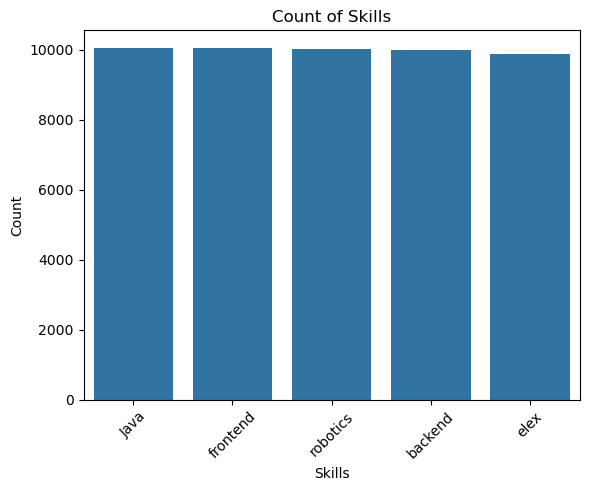

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_json("studentData")
df.head()
sns.barplot(x=df['Skills'].explode().value_counts().index, y=df['Skills'].explode().value_counts())
plt.xlabel('Skills')
plt.ylabel('Count')
plt.title('Count of Skills')
plt.xticks(rotation=45)
plt.show()




COSINE SIMILARITY TDIF VECTORIZATION


In [8]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
# Convert the skills column into a list of strings
skill_strings = df['Skills'].apply(lambda x: ' '.join(x)).tolist()

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Transform the skill strings into TF-IDF vectors
tfidf_matrix = vectorizer.fit_transform(skill_strings)

print(tfidf_matrix)

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

# Print the cosine similarity matrix
print(cosine_sim)




  (0, 0)	0.33271945169399914
  (0, 1)	0.6710704096479815
  (0, 2)	0.6625422792240017
  (1, 0)	0.8298830045897694
  (1, 1)	0.5579374505202682
  (2, 3)	0.6651151967660076
  (2, 4)	0.6668879767186755
  (2, 1)	0.3359794659484212
  (3, 3)	0.7557199939092826
  (3, 4)	0.37886713471178984
  (3, 0)	0.3785444428265477
  (3, 2)	0.3768966567192803
  (4, 3)	0.5540052645645686
  (4, 0)	0.8325131631600443
  (5, 3)	0.37578921862966624
  (5, 0)	0.37646991354701914
  (5, 1)	0.7593118401039215
  (5, 2)	0.3748311577678697
  (6, 3)	0.3757438054017679
  (6, 4)	0.3767453027195171
  (6, 1)	0.7592200790848952
  (6, 2)	0.374785860319334
  (7, 3)	0.7557199939092826
  (7, 4)	0.37886713471178984
  (7, 0)	0.3785444428265477
  :	:
  (9991, 2)	0.8287533976442978
  (9992, 3)	0.37673770266180084
  (9992, 4)	0.7554836981725409
  (9992, 0)	0.3774201156387144
  (9992, 1)	0.3806141635566248
  (9993, 3)	0.6663183586632718
  (9993, 0)	0.6675253105863072
  (9993, 2)	0.3323098021950862
  (9994, 3)	0.6660652971935177
  (9994, 4

Creating a Recommender Funtion


In [9]:
def recommender(skill_list):
    # Convert the skill_list into a string
    skill_string = ' '.join(skill_list)

    # Transform the skill string into a TF-IDF vector
    skill_vector = vectorizer.transform([skill_string])

    # Compute the cosine similarity scores between the skill vector and all student vectors
    scores = cosine_similarity(skill_vector, tfidf_matrix)

    # Find the index of the student with the highest cosine similarity score
    best_student_index = np.argmax(scores)

    # Get the best student from the dataframe
    best_student = df.iloc[best_student_index]

    return best_student
recommender(["Java","elex"])


Name                          Renee Tank
SAP ID                          84682278
Branch                              AIML
Skills    [elex, Java, elex, Java, elex]
Gender                              Male
Name: 216, dtype: object

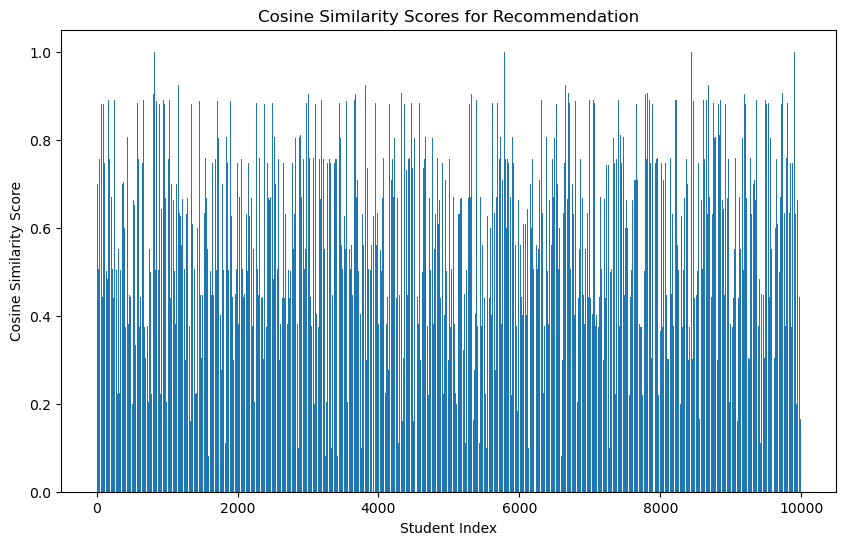

In [10]:
# Compute the cosine similarity scores between the skill vector and all student vectors
scores = cosine_similarity(tfidf_matrix)

# Create a bar plot of the cosine similarity scores
plt.figure(figsize=(10, 6))
plt.bar(range(len(scores[0])), scores[0])
plt.xlabel('Student Index')
plt.ylabel('Cosine Similarity Score')
plt.title('Cosine Similarity Scores for Recommendation')
plt.show()
